In [1]:
using LaTeXStrings

# See https://github.com/JuliaStrings/LaTeXStrings.jl/blob/master/src/LaTeXStrings.jl#L54-L92
@eval LaTeXStrings begin
export @K_str
latexstringraw(a...) = LaTeXString(prod(string(x) for x in a))
@doc raw"""
    K"..."

is equivalent to `LaTeXString(raw"...")`, except that
`%$` can be used for interpolation.

```jldoctest
julia> K"foo"
LaTeXString("foo")

julia> K"π = %$(float(π))"
LaTeXString("π = 3.141592653589793")
```
"""
macro K_str(s::String)
    i = firstindex(s)
    buf = IOBuffer(maxsize=ncodeunits(s))
    ex = Expr(:call, GlobalRef(LaTeXStrings, :latexstringraw))
    while i <= ncodeunits(s)
        c = @inbounds s[i]
        i = nextind(s, i)
        if c === '%' && i <= ncodeunits(s)
            c = @inbounds s[i]
            if c === '$'
                position(buf) > 0 && push!(ex.args, String(take!(buf)))
                atom, i = parseatom(s, nextind(s, i), filename=string(__source__.file))
                Meta.isexpr(atom, :incomplete) && error(atom.args[1])
                atom !== nothing && push!(ex.args, atom)
                continue
            else
                print(buf, '%')
            end
        else
            print(buf, c)
        end
    end
    position(buf) > 0 && push!(ex.args, String(take!(buf)))
    return esc(ex)
end
end

@doc @K_str

```
K"..."
```

is equivalent to `LaTeXString(raw"...")`, except that `%$` can be used for interpolation.

```jldoctest
julia> K"foo"
LaTeXString("foo")

julia> K"π = %$(float(π))"
LaTeXString("π = 3.141592653589793")
```


In [2]:
L"foo"

L"$foo$"

In [3]:
K"foo"

L"foo"

In [4]:
L"π = %$(float(π))"

L"$π = 3.141592653589793$"

In [5]:
K"π = %$(float(π))"

L"π = 3.141592653589793"

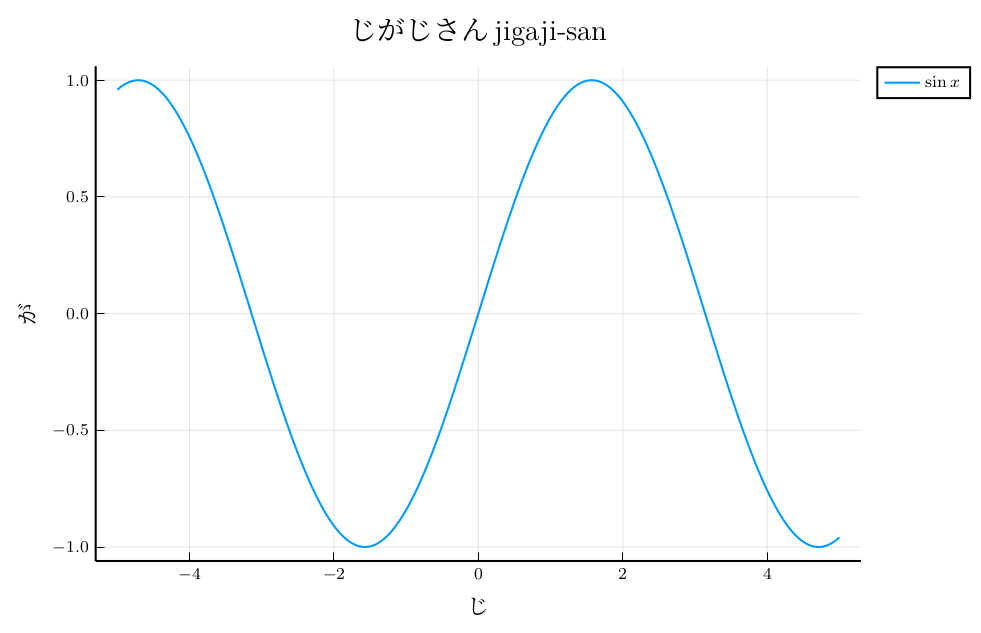

In [6]:
using Plots
default(fmt=:png)
pgfplotsx()

# LaTeX のプリアンブルにフォント指定
PGFPlotsX.CUSTOM_PREAMBLE = [raw"\usepackage{luatexja}"]

# 日本語を含むプロット
plot(sin; label=L"\sin x", title=K"じがじさんjigaji-san", xguide=K"じ", yguide=K"が")
plot!(tex_output_standalone=true)
savefig("test.tex")
plot!()

In [7]:
; cat test.tex

\RequirePackage{luatex85}
\documentclass[tikz]{standalone}
% Default preamble
\usepackage{pgfplots}
\pgfplotsset{compat=newest}
\usepgfplotslibrary{groupplots}
\usepgfplotslibrary{polar}
\usepgfplotslibrary{smithchart}
\usepgfplotslibrary{statistics}
\usepgfplotslibrary{dateplot}
\usepgfplotslibrary{ternary}
% Custom preamble from global variable:
\usepackage{luatexja}
\usetikzlibrary{arrows.meta}
\usetikzlibrary{backgrounds}
\usepgfplotslibrary{patchplots}
\usepgfplotslibrary{fillbetween}
\pgfplotsset{%
    layers/standard/.define layer set={%
        background,axis background,axis grid,axis ticks,axis lines,axis tick labels,pre main,main,axis descriptions,axis foreground%
    }{
        grid style={/pgfplots/on layer=axis grid},%
        tick style={/pgfplots/on layer=axis ticks},%
        axis line style={/pgfplots/on layer=axis lines},%
        label style={/pgfplots/on layer=axis descriptions},%
        legend style={/pgfplots/on layer=axis descriptions},%
        title style={/p